In [1]:
import numpy as np
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
from util import *
from Functions import *
%matplotlib inline

1. Define the Standard Signals

In [2]:
ch, inv_ch, known_frames, carrier_indices = create_standard()

Creating known ofdm frame


2. Read the recorded sound file

In [3]:
rx_signal = real_channel_response_file("sound_files/standard_v1.2_10.8s.wav")
'''
channel = np.load('channel_imp.npy')
channel -= np.average(channel)
rx_signal = np.convolve(tx_signal, channel)
'''

KeyError: 64

3. Some useful plots

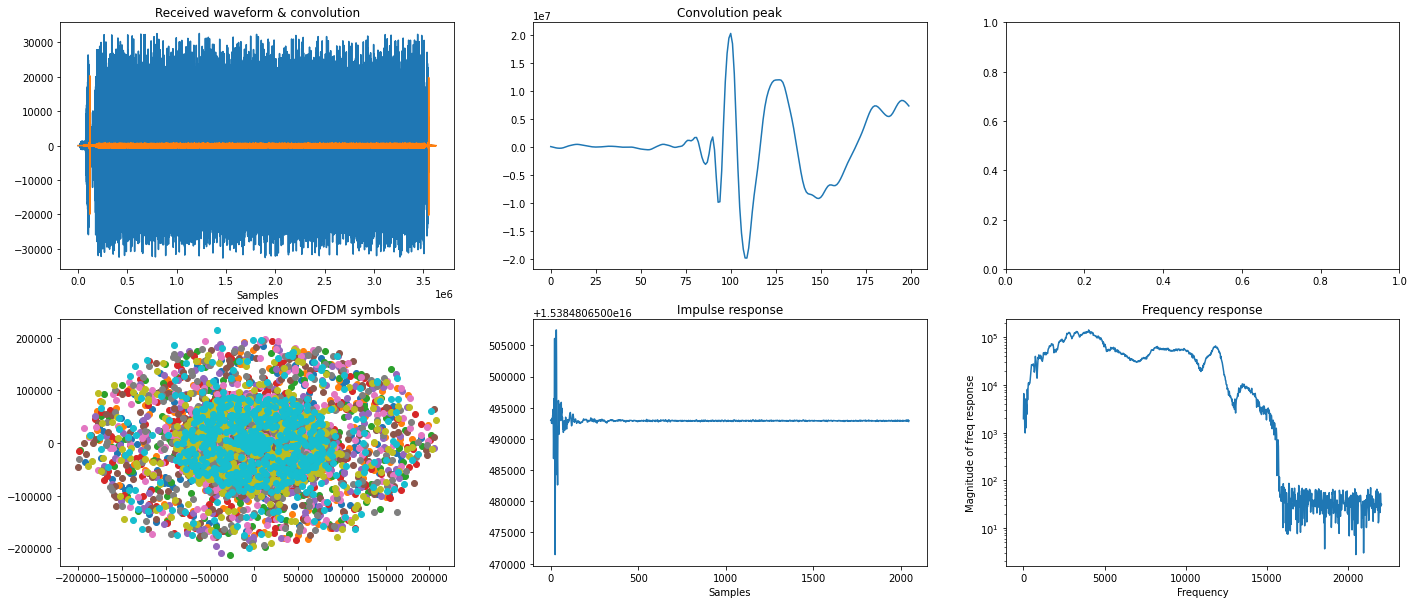

In [10]:
rx_convolution, peak_start, peak_end = matched_filter(rx_signal, inv_ch)
offset = 30
freq_response, imp_response, rx_known_frames = channel_estimate(rx_signal, peak_start, known_frames, offset)
figs, axs = plt.subplots(2, 3, figsize=(24,10))
axs[0][0].plot(rx_signal)
axs[0][0].set_title('Received waveform & convolution')
axs[0][0].plot(rx_convolution/1000)
axs[0][0].set_xlabel('Samples')
axs[0][1].set_title('Convolution peak')
axs[0][1].plot(rx_convolution[peak_start-100:peak_start+100])

for i in range(len(rx_known_frames)):
    tst_symbols = np.fft.fft(rx_known_frames[i][prefix_no:], N)[1:N//2]
    axs[1][0].scatter(np.real(tst_symbols), np.imag(tst_symbols), label=i)
axs[1][0].set_title('Constellation of received known OFDM symbols')

axs[1][1].set_title('Impulse response')
axs[1][1].set_xlabel('Samples')
axs[1][1].plot(imp_response)
axs[1][2].set_title('Frequency response')
axs[1][2].set_ylabel('Magnitude of freq response')
axs[1][2].set_xlabel('Frequency')
axs[1][2].semilogy(np.linspace(1, fs//2 -1, N//2-2), np.abs(freq_response[1:N//2-1]))

4. File decoding

Manual Block

In [18]:
bits_rec, imp_response = test(rx_signal, peak_start, peak_end, known_frames, inv_ch, carrier_indices, offset)

inside LDPC_decode_with_niceCKs
type(ys_)= <class 'numpy.ndarray'>
type(cks)= <class 'numpy.ndarray'>
about to ys_=ys_/ cks
ys_=ys_/ cks finished
about to do ys=separate_real_img(ys_)
about to do divide_codebits
about to loop
decoding 0th LDPC block, 778 in total tif= 0  txt= 3  wav= 0
file_type:  .txt

total_length:  1508400  bits to decode.
file_length: 754200
decoding 776th LDPC block, 778 in total
padding_bits_len:  844
llrs_index_start:  128
violating llr at llrs_index_start+i= 246
violating llr at llrs_index_start+i= 254
violating llr at llrs_index_start+i= 400
violating llr at llrs_index_start+i= 407
violating llr at llrs_index_start+i= 418
violating llr at llrs_index_start+i= 423
violating llr at llrs_index_start+i= 427
violating llr at llrs_index_start+i= 437
violating llr at llrs_index_start+i= 876
violating llr at llrs_index_start+i= 879
violating llr at llrs_index_start+i= 890
violating llr at llrs_index_start+i= 907
return [LDPCstr_decoded,file_type] , please check you hav

NameError: name 'bits_tran' is not defined

Auto Block

In [21]:
bits_rec, best_imp_response = fine_tuning(rx_signal, peak_start, peak_end, known_frames, inv_ch, carrier_indices, find_range=30, offset=20)

index and score are: -15 20.22925194977924
index and score are: -14 20.960949809622708
index and score are: -13 20.952290413061625
index and score are: -12 21.391983794723004
index and score are: -11 21.57741463096138
index and score are: -10 21.477767578620576
index and score are: -9 21.456297621892592
index and score are: -8 21.571634680672236
index and score are: -7 21.693110146002926
index and score are: -6 21.819269278940777
index and score are: -5 21.819309019196684
index and score are: -4 21.82147789369101
index and score are: -3 21.71411958194069
index and score are: -2 21.56970910259262
index and score are: -1 21.526416825613197
index and score are: 0 21.48579243051449
index and score are: 1 21.383753270870265
index and score are: 2 21.32801261696539
index and score are: 3 21.290275919468176
index and score are: 4 21.255105506125624
index and score are: 5 21.25378923078273
index and score are: 6 21.1454190458648
index and score are: 7 20.97886993577227
index and score are: 8 2